In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
diabetes_DS = pd.read_csv('data/diabetes.csv')

In [3]:
diabetes_DS.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_DS.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes_DS.shape

(768, 9)

In [6]:
diabetes_DS['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 - Non-Diabetic \
1 - Diabetic

In [7]:
df = diabetes_DS.groupby('Outcome').mean().T

In [8]:
df

Outcome,0,1
Pregnancies,3.298000,4.865672
Glucose,109.980000,141.257463
BloodPressure,68.184000,70.824627
SkinThickness,19.664000,22.164179
Insulin,68.792000,100.335821
BMI,30.304200,35.142537
DiabetesPedigreeFunction,0.429734,0.550500
Age,31.190000,37.067164


This formula calculates the percentage difference between values in columns labeled 0 and 1 in the DataFrame 'df'. The result is then stored in a new column labeled '%diff'. This formula is commonly used to measure the relative difference between two values.

In [9]:
df['%diff'] = (abs(df[0] - df[1] )/ ((df[0] + df[1])/2)) *100

In [10]:
df

Outcome,0,1,%diff
Pregnancies,3.298000,4.865672,38.406044
Glucose,109.980000,141.257463,24.898725
BloodPressure,68.184000,70.824627,3.799227
SkinThickness,19.664000,22.164179,11.954520
Insulin,68.792000,100.335821,37.301753
BMI,30.304200,35.142537,14.785572
DiabetesPedigreeFunction,0.429734,0.550500,24.640239
Age,31.190000,37.067164,17.220651


In [11]:
data = diabetes_DS.drop(columns= 'Outcome', axis=1)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

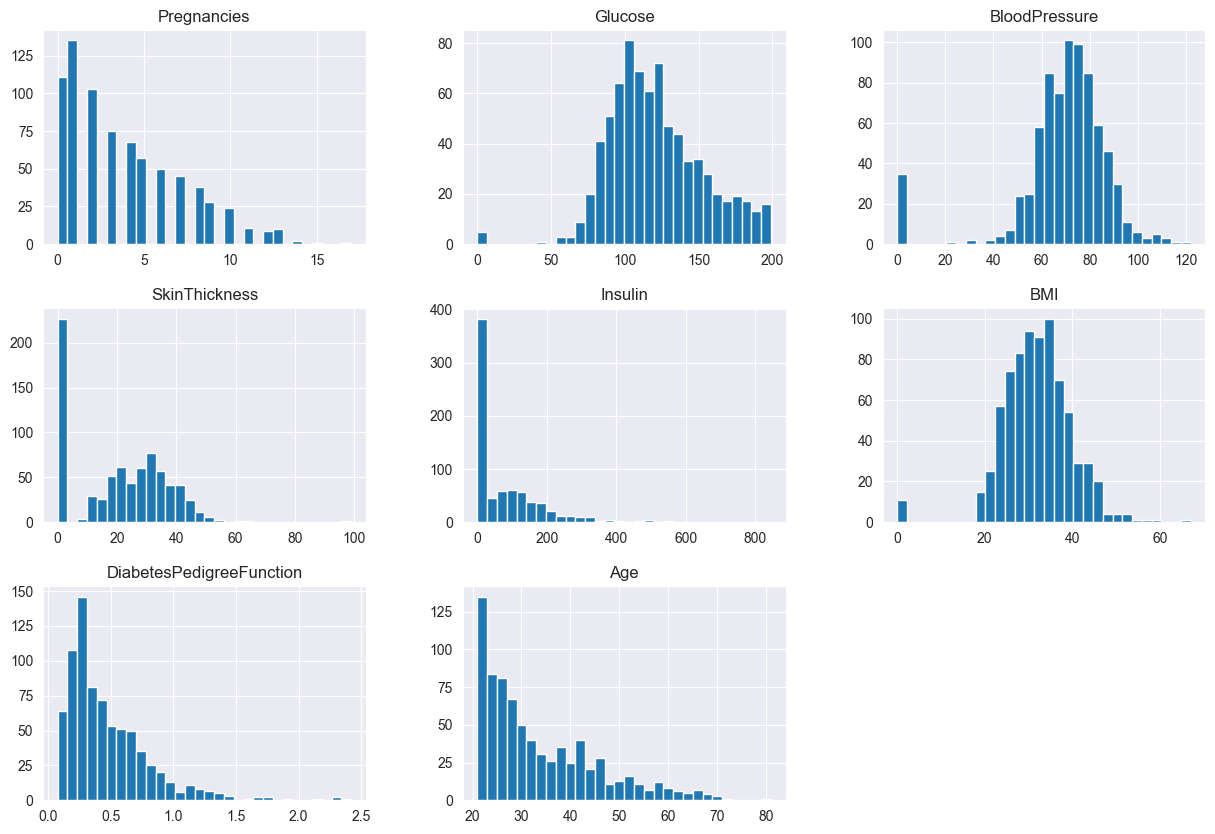

In [13]:
data.hist(bins=30, figsize=(15,10))
plt.show()

In [14]:
from pandas.plotting import scatter_matrix

<Axes: >

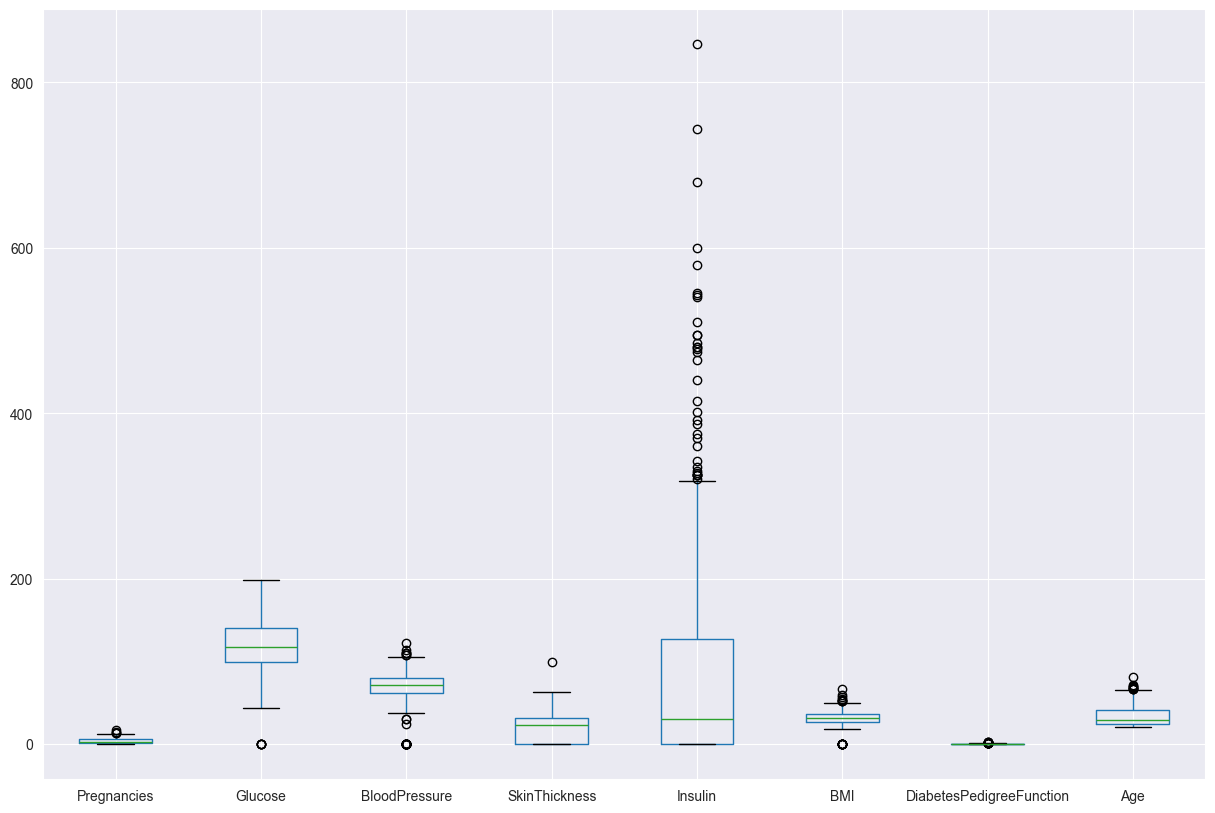

In [15]:
data.boxplot(figsize=(15,10))

In [16]:
corr_matrix = data.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


<Axes: >

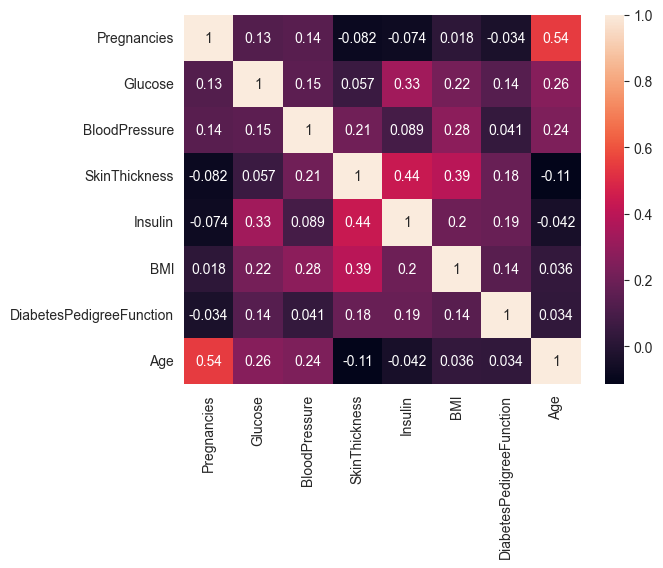

In [17]:
sns.heatmap(corr_matrix, annot= True)

handling missing or zero values in a dataset

In [18]:
# Calculate the median value for BMI
median_bmi = data['BMI'].median()
# Substitute it in the BMI column of the
# dataset where values are 0
data['BMI'] = data['BMI'].replace(
    to_replace=0, value=median_bmi)

median_bloodp = data['BloodPressure'].median()
# Substitute it in the BloodP column of the
# dataset where values are 0
data['BloodPressure'] = data['BloodPressure'].replace(
    to_replace=0, value=median_bloodp)

# Calculate the median value for PlGlcConc
median_plglcconc = data['Glucose'].median()
# Substitute it in the PlGlcConc column of the
# dataset where values are 0
data['Glucose'] = data['Glucose'].replace(
    to_replace=0, value=median_plglcconc)

# Calculate the median value for SkinThick
median_skinthick = data['SkinThickness'].median()
# Substitute it in the SkinThick column of the
# dataset where values are 0
data['SkinThickness'] = data['SkinThickness'].replace(
    to_replace=0, value=median_skinthick)

# Calculate the median value for SkinThick
median_skinthick = data['Insulin'].median()
# Substitute it in the SkinThick column of the
# dataset where values are 0
data['Insulin'] = data['Insulin'].replace(
    to_replace=0, value=median_skinthick)

Use Z-scores to identify and filter out the outliers.

In [19]:
from scipy import stats
# Define a threshold for the Z-score
z_threshold = 3
# Calculate the Z-scores for each column
z_scores = stats.zscore(diabetes_DS)

# Create a boolean mask for outliers
outlier_mask = (abs(z_scores) < z_threshold).all(axis=1)

# Filter the dataset to remove outliers
diabetes_DS2 = diabetes_DS[outlier_mask]

# Print information about the removed outliers
outliers_removed = diabetes_DS.shape[0] - diabetes_DS2.shape[0]
print(f"Number of outliers removed: {outliers_removed}")

Number of outliers removed: 80


<Axes: >

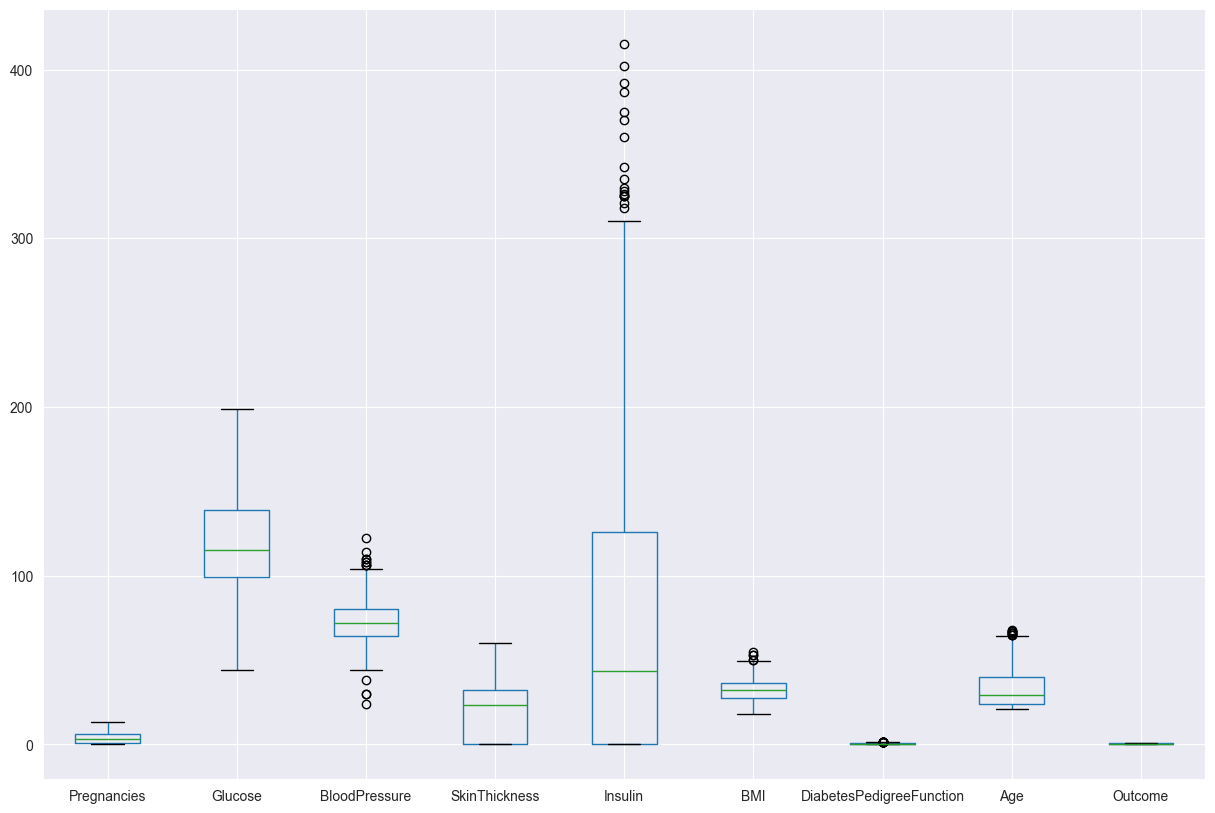

In [20]:
diabetes_DS2.boxplot(figsize=(15,10))


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(diabetes_DS2.drop(columns= 'Outcome', axis=1))
Y = diabetes_DS2['Outcome']

In [22]:
X[0:5]

array([[ 0.65735547,  0.92404008, -0.02811548,  0.92321895, -0.80526561,
         0.21028523,  0.60651604,  1.47921983],
       [-0.86848989, -1.17708222, -0.51576543,  0.53346156, -0.80526561,
        -0.84806325, -0.36422044, -0.18326505],
       [ 1.26769361,  2.09133025, -0.67831541, -1.35036587, -0.80526561,
        -1.34699896,  0.76478829, -0.09576584],
       [-0.86848989, -1.04367763, -0.51576543,  0.14370416,  0.23869826,
        -0.62127429, -1.01137809, -1.05825709],
       [ 0.3521864 , -0.14319664,  0.13443451, -1.35036587, -0.80526561,
        -0.99925589, -0.89179461, -0.27076425]])

In [23]:
Y.head()

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=42)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(688, 8) (550, 8) (138, 8)


In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logisticregression = LogisticRegression(solver='lbfgs', max_iter=200)

In [28]:
logisticregression.fit(X_train,Y_train)

LogisticRegression(max_iter=200)

In [29]:
from sklearn.metrics import classification_report

In [30]:
round(logisticregression.score(X_train, Y_train)*100, 2)

79.27

In [31]:
round(logisticregression.score(X_test, Y_test)*100, 2)

78.99

In [32]:
from sklearn.metrics import classification_report

In [33]:
Y_pred = logisticregression.predict(X_test)
Y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1], dtype=int64)

In [34]:
print(Y_pred)

[0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1
 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1]


In [35]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        92
           1       0.76      0.54      0.63        46

    accuracy                           0.79       138
   macro avg       0.78      0.73      0.74       138
weighted avg       0.79      0.79      0.78       138



In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)


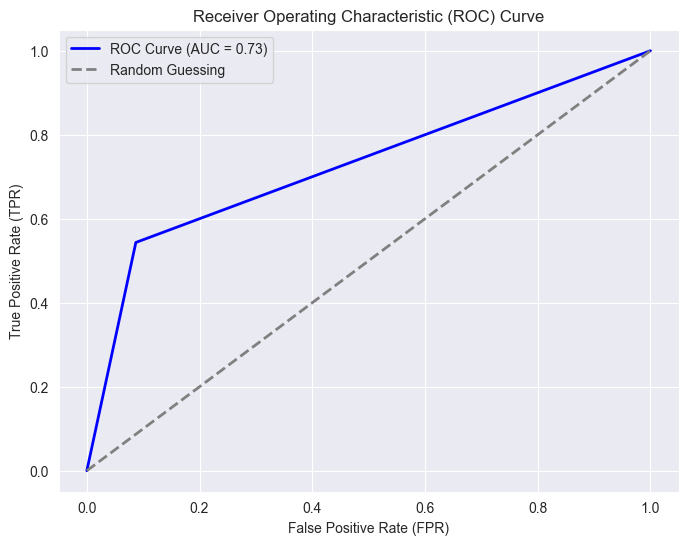

In [37]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [38]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [39]:
cross_val_score(logisticregression, X , Y , cv=StratifiedKFold(n_splits=5))

array([0.7826087 , 0.76086957, 0.76811594, 0.81021898, 0.79562044])

In [40]:
cross_val_score(logisticregression, X , Y , cv=StratifiedKFold(n_splits=5)).mean()

0.7834867237913891

# MLP model with tensorflow

In [41]:
X_train_scaled =  X_train
X_test_scaled =  X_test


In [42]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(8,)),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [43]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy' , tf.keras.metrics.AUC()])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dense_1 (Dense)             (None, 25)                525       
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 731 (2.86 KB)
Trainable params: 731 (2.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
history = model.fit(X_train_scaled, Y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100


14/14 [==============================] - 1s 12ms/step - loss: 0.6254 - accuracy: 0.6864 - auc: 0.6401 - val_loss: 0.5974 - val_accuracy: 0.6818 - val_auc: 0.6798
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5968 - accuracy: 0.6886 - auc: 0.7232 - val_loss: 0.5720 - val_accuracy: 0.7000 - val_auc: 0.7216
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5724 - accuracy: 0.7068 - auc: 0.7612 - val_loss: 0.5468 - val_accuracy: 0.7091 - val_auc: 0.7672
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5507 - accuracy: 0.7068 - auc: 0.7805 - val_loss: 0.5269 - val_accuracy: 0.6818 - val_auc: 0.7897
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5313 - accuracy: 0.7250 - auc: 0.7954 - val_loss: 0.5085 - val_accuracy: 0.7091 - val_auc: 0.8017
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5154 - accuracy: 0.7409 - auc: 0.8064 - val_loss: 0.4941 

In [45]:
# Evaluate the model on the test set
test_loss, test_accuracy, test_auc = model.evaluate(X_test_scaled, Y_test)
print(f'\nTest Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test AUC: {test_auc:.4f}')

5/5 [==============================] - 0s 1ms/step - loss: 0.5595 - accuracy: 0.7391 - auc: 0.8177

Test Accuracy: 73.91%
Test AUC: 0.8177


In [46]:
 # Predict probabilities on the test set
y_pred  = model.predict(X_test_scaled)


5/5 [==============================] - 0s 750us/step


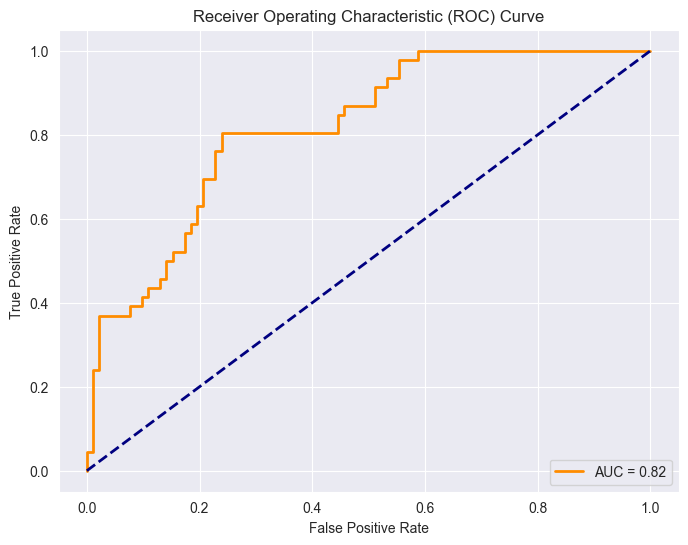

In [47]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred)
#roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

